<center>
<h1><b>Machine Learning (DSCI-6003)</b></h1>
<h2><b>Predicting Sales Using Linear Regression</b></h2>
<h3><b>Professor: Md Moinuddin Bhuiyan</b></h3>
<h3><b>Group Members:</b></h3>
<h4><b>krishna sai manas karthik Bhiravajosyula</b></h4>
<h4><b>Pavan Reddy Boyapally</b></h4>
<h4><b>Jagadeesh Chandra Bose Mende</b></h4>
</center>



# <center><font size="+2">ABSTRACT</font></center>

<font size="+1">This study utilizes a dataset encompassing TV, radio, and newspaper advertising expenditures, alongside corresponding sales figures, to investigate their predictive relationship. Employing a regression model, we aim to discern the influence of each advertising platform on sales outcomes. Through thorough analysis, we seek to identify which advertising channels exhibit the strongest impact on sales and provide insights into optimizing marketing strategies for enhanced sales performance. This study contributes to the understanding of the effectiveness of different advertising mediums in driving sales, offering valuable guidance for businesses aiming to allocate their advertising budgets effectively.</font>


<font size="+1">Moreover, we delve into the consumer behavior aspects associated with different advertising mediums. By analyzing consumer preferences, attitudes, and responses to various advertising campaigns, we aim to uncover deeper insights into the mechanisms driving sales. Understanding consumer behavior is crucial for tailoring advertising strategies that resonate with target audiences, ultimately leading to improved sales outcomes.</font>





# <center><font size="+2">INTRODUCTION</font></center>

<font size="+1">In our project, we're diving into the world of advertising expenditures across various platforms like TV, radio, and newspaper, and how they affect sales. Through some in-depth regression analysis, our goal is to figure out which advertising channels really pack a punch when it comes to driving sales. We're excited to uncover some fresh insights into how different marketing strategies play out in the real world and help businesses make smarter decisions about where to invest their advertising budgets for maximum impact on sales. It's all about finding those hidden gems in the data that can make a big difference for businesses looking to boost their bottom line.</fontter>

<font size="+1">Furthermore, our study aims to explore the temporal dynamics of advertising effectiveness. By analyzing seasonal variations and trends in consumer behavior, we seek to provide nuanced insights into the optimal timing and frequency of advertising campaigns. Understanding these temporal aspects can empower businesses to capitalize on peak sales periods and maximize the return on their advertising investments.</font>
>


# <center><font size="+2">METHODS</font></center>

<font size="+1">In this study, we employed linear regression analysis to analyze our dataset. Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. In our case, the dependent variable is the sales figures, while the independent variables include advertising expenditures on TV, radio, and newspaper. By fitting a linear regression model to the data, we aimed to understand the impact of each advertising platform on sales outcomer.</font>



# <center><font size="+2">DATA PREPROCESSING</font></center>

In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# <center><font size="+2">DATA INFORMATION</font></center>
# The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

In [18]:
# Load the data set both training and test data

data = pd.read_csv("Training_data_advertising.csv")

# print first five rows of our data
train_data.head()

,ID,TV Ad Budget ($) in 1000,Radio Ad Budget ($) in 1000,Newspaper Ad Budget ($) in 1000,Sales ($) in 1000000(M)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:
# ensure that data has no null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               200 non-null    int64  
 1   TV Ad Budget ($) in 1000         200 non-null    float64
 2   Radio Ad Budget ($) in 1000      200 non-null    float64
 3   Newspaper Ad Budget ($) in 1000  200 non-null    float64
 4   Sales ($) in 1000000(M)          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
# Display all the columns in the Data

train_data.columns

Index(['ID', 'TV Ad Budget ($) in 1000', 'Radio Ad Budget ($) in 1000',
       'Newspaper Ad Budget ($) in 1000', 'Sales ($) in 1000000(M)'],
      dtype='object')

# Exploratory Data Analysis


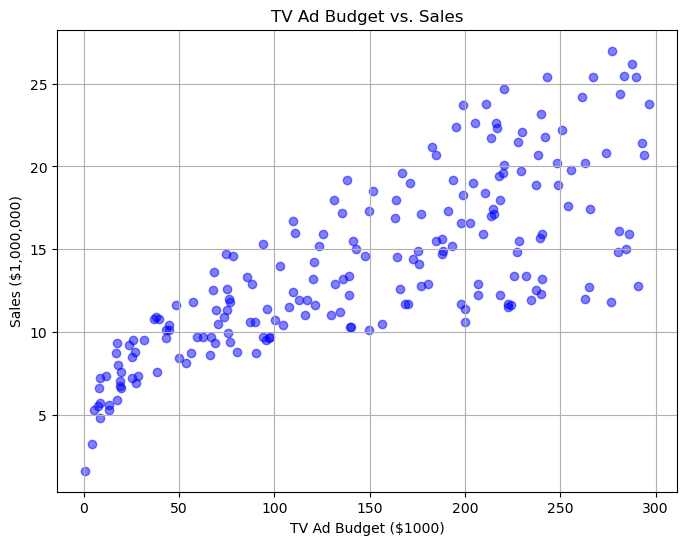

In [21]:
# Scatter plot of TV ad budget vs. sales
plt.figure(figsize=(8, 6))
plt.scatter(data['TV Ad Budget ($) in 1000'], data['Sales ($) in 1000000(M)'], color='blue', alpha=0.5)
plt.xlabel('TV Ad Budget ($1000)')
plt.ylabel('Sales ($1,000,000)')
plt.title('TV Ad Budget vs. Sales')
plt.grid(True)
plt.show()


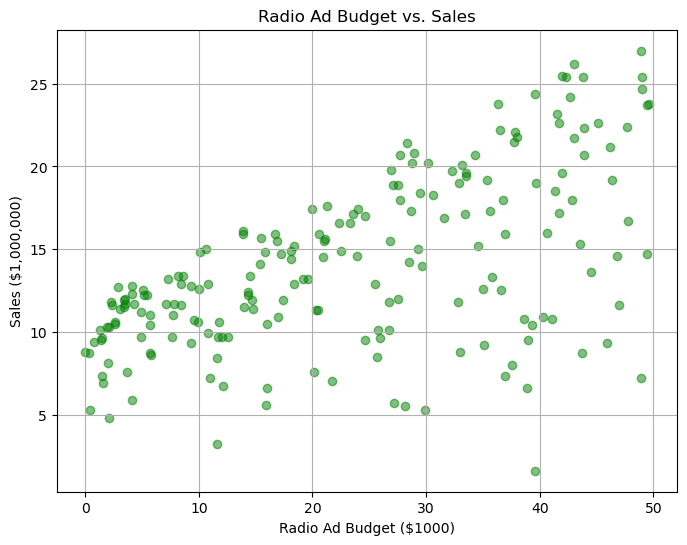

In [22]:
# Scatter plot of Radio ad budget vs. sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Radio Ad Budget ($) in 1000'], data['Sales ($) in 1000000(M)'], color='green', alpha=0.5)
plt.xlabel('Radio Ad Budget ($1000)')
plt.ylabel('Sales ($1,000,000)')
plt.title('Radio Ad Budget vs. Sales')
plt.grid(True)
plt.show()

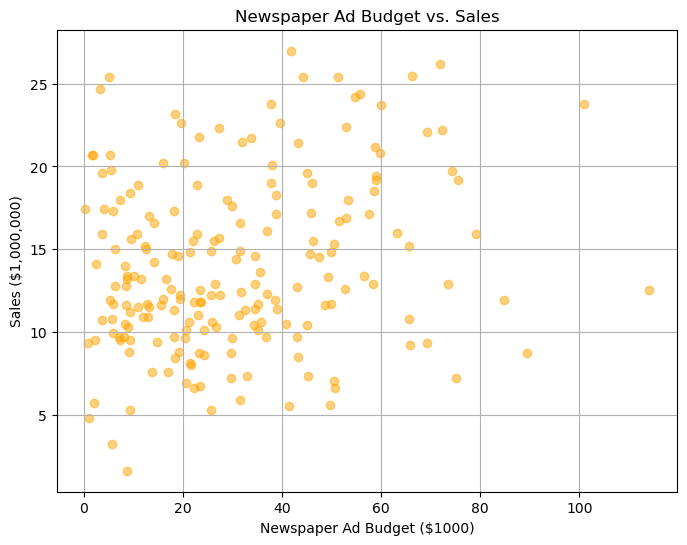

In [23]:
# Scatter plot of Newspaper ad budget vs. sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Newspaper Ad Budget ($) in 1000'], data['Sales ($) in 1000000(M)'], color='orange', alpha=0.5)
plt.xlabel('Newspaper Ad Budget ($1000)')
plt.ylabel('Sales ($1,000,000)')
plt.title('Newspaper Ad Budget vs. Sales')
plt.grid(True)
plt.show()

The visual in scatter plot suggests that Advertising on all three media had increment on  total sales

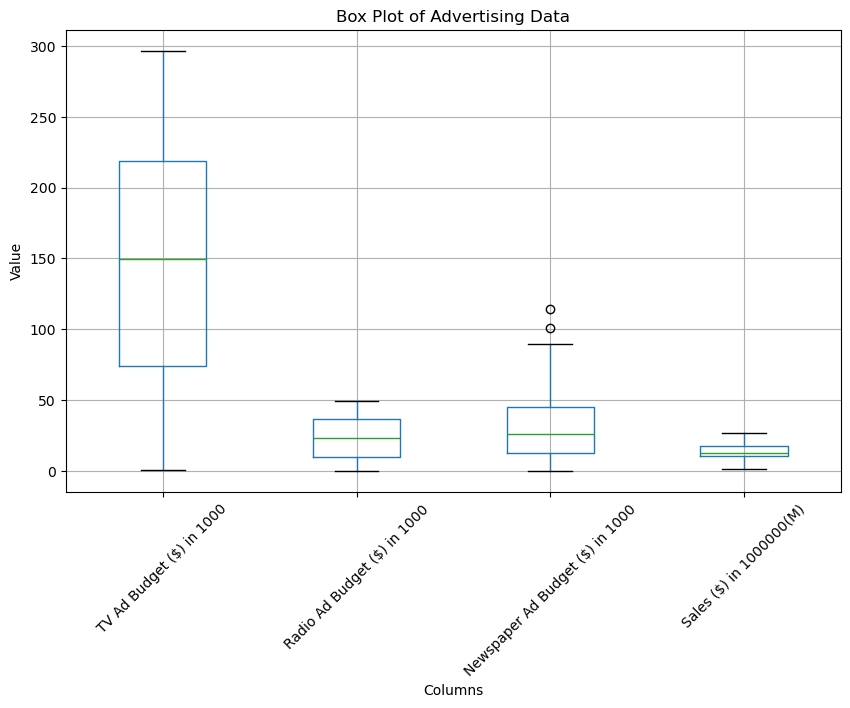

In [36]:
# Drop the 'ID' column as it's not needed for visualization
data = data.drop('ID', axis=1)

# Create box plots for each column
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot of Advertising Data')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

By examining the box plot for each variable, you can gain insights into its distribution, central tendency, spread, and the presence of outliers. This can help you understand the characteristics of your data and identify any potential issues or patterns.








# <center><font size="+2">Model Training</font></center>

In [32]:

# Extracting features and target variable from the full dataset
X = data.drop('Sales ($) in 1000000(M)', axis=1)
y = data['Sales ($) in 1000000(M)']
# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 4)
y_train shape: (140,)
X_test shape: (60, 4)
y_test shape: (60,)


# <center><font size="+2">Initialise the training classifier</font></center>

In [33]:
# Initialize linear regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

LinearRegression()

# <center><font size="+2">Model evaluation</font></center>

In [34]:
# Predict on test data
y_pred = model.predict(X_test)
# print the predicted data
y_pred 

array([16.56581778, 21.1804797 , 21.54440211, 10.89594674, 22.20422155,
       13.35811188, 21.19371189,  7.35723223, 13.28243942, 15.11907355,
        9.01025527,  6.53399652, 14.31067157,  8.9675858 ,  9.46556446,
       12.01266538,  8.91173461, 16.160977  , 10.29431598, 18.72083349,
       19.77226614, 13.76939567, 12.50085507, 21.53582335,  7.60425655,
        5.60788293, 20.91614465, 11.80237377,  9.08337367,  8.51666065,
       12.16659861,  9.96068717, 21.72664731, 12.77756633, 18.10644734,
       20.07544506, 14.26503177, 20.94306381, 10.84517829,  4.37943779,
        9.51113547, 12.41397184, 10.16460264,  8.08293205, 13.1656671 ,
        5.23369548,  9.28235707, 14.08483506,  8.69496881, 11.65949021,
       15.72025743, 11.63848467, 13.3458554 , 11.1568059 ,  6.33779081,
        9.75906265,  9.42324492, 24.25567017,  7.70231778, 12.15200343])

In [35]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate the number of observations
n = len(y_test)

# Calculate the number of predictors (features)
p = X_test.shape[1]

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 3.797646660967102
R-squared Score: 0.8609155416329135
Adjusted R-squared: 0.8508003082971254


# <center><font size="+2">Results and explanation</font></center>

Mean Squared Error (MSE): My MSE is approximately 3.798, which means, on average, my model's predictions are off by about 3.798 million dollars squared. Lower MSE values indicate better performance, so this is a reasonably good result.

R-squared Score: My R-squared score is approximately 0.861, indicating that approximately 86.1% of the variance in the sales can be explained by the advertising budgets in my model. This is a good fit for a regression model.

Adjusted R-squared Score: My adjusted R-squared score is approximately 0.851. Adjusted R-squared takes into account the number of predictors in the model, and it penalizes the addition of unnecessary predictors. This value suggests that my model is still performing well even after considering the number of predictors.

# <center><font size="+2">Data Visualization</font></center>

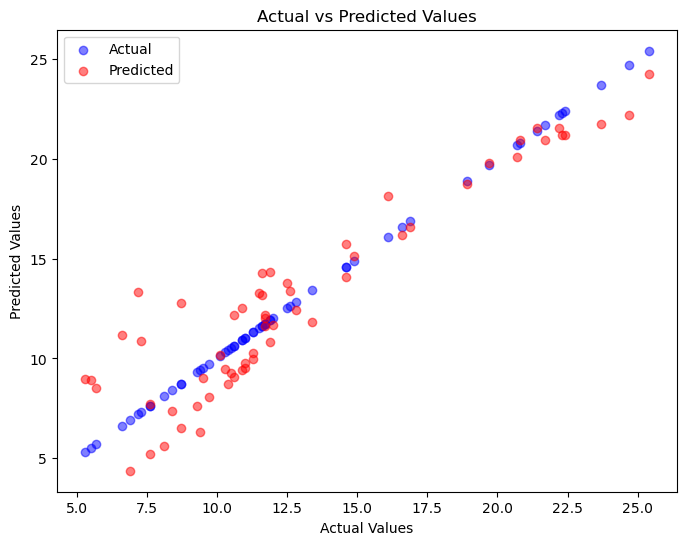

In [42]:
# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')  # Actual values in blue
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')  # Predicted values in red
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

This visual shows actual values vs predicted values for our model which explains some deviations from actual points due to models accuracy

# <center><font size="+2">Conclusion</font></center>

Based on the analysis conducted, it appears that the linear regression model built to predict sales based on advertising budgets (TV, radio, and newspaper) has yielded promising results. With a mean squared error of approximately 3.798 and an R-squared score of around 0.861, the model demonstrates a good level of accuracy in capturing the relationship between advertising expenditures and sales revenue. Furthermore, visual examination of the actual versus predicted values suggests that the model effectively captures the underlying trends, as evidenced by the alignment of data points along the diagonal. Overall, the findings suggest that the constructed model can serve as a valuable tool for businesses in making informed decisions regarding their advertising strategies to optimize sales performance.
.
